In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [0]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
#X will be numpy array of array and y is for labels(0 1 2)
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, 
                           centers=centers, cluster_std= 0.4)

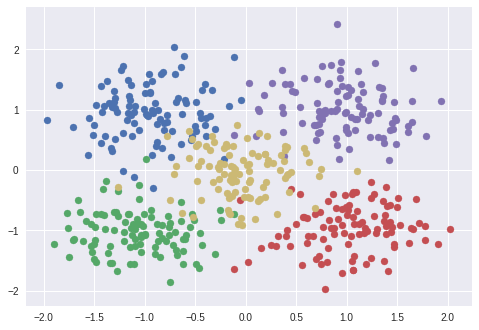

In [62]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [63]:
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [0]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=60)

Epoch 1/60
500/500 [==============================] - 0s 365us/step - loss: 1.4129 - acc: 0.4320
Epoch 2/60
500/500 [==============================] - 0s 31us/step - loss: 0.6834 - acc: 0.8180
Epoch 3/60
500/500 [==============================] - 0s 27us/step - loss: 0.4476 - acc: 0.8980
Epoch 4/60
500/500 [==============================] - 0s 26us/step - loss: 0.3520 - acc: 0.9360
Epoch 5/60
500/500 [==============================] - 0s 23us/step - loss: 0.3057 - acc: 0.9440
Epoch 6/60
500/500 [==============================] - 0s 26us/step - loss: 0.2777 - acc: 0.9440
Epoch 7/60
500/500 [==============================] - 0s 29us/step - loss: 0.2590 - acc: 0.9460
Epoch 8/60
500/500 [==============================] - 0s 24us/step - loss: 0.2439 - acc: 0.9500
Epoch 9/60
500/500 [==============================] - 0s 28us/step - loss: 0.2340 - acc: 0.9480
Epoch 10/60
500/500 [==============================] - 0s 28us/step - loss: 0.2246 - acc: 0.9480
Epoch 11/60
500/500 [=================

In [0]:
def plot_decision_boundary(X, y_cat, model):
  #equally space between the elements
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  print(xx_)
  print(yy_)
  grid = np.c_[xx_, yy_]
  pred_func = model.predict_classes(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

[-2.2206717  -2.12894493 -2.03721815 ...  2.09048655  2.18221332
  2.27394009]
[-2.22723031 -2.22723031 -2.22723031 ...  2.67863169  2.67863169
  2.67863169]


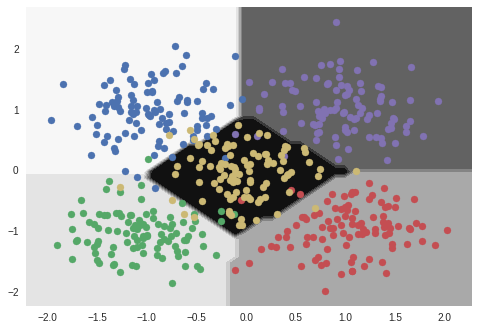

In [67]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

[-2.2206717  -2.12894493 -2.03721815 ...  2.09048655  2.18221332
  2.27394009]
[-2.22723031 -2.22723031 -2.22723031 ...  2.67863169  2.67863169
  2.67863169]
Prediction is [3]


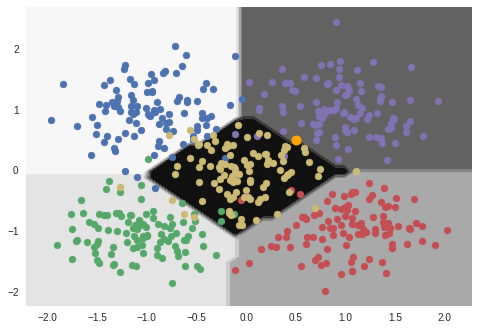

In [68]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x=0.5
y=0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='orange')
print("Prediction is", prediction)